In [15]:
import cv2 as cv2 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [2]:
dataset= r'C:\Users\USER\Downloads\DL\Dataset\brain_tumor_dataset'
yes_path = r'C:\Users\USER\Downloads\DL\Dataset\brain_tumor_dataset\yes'
no_path = r'C:\Users\USER\Downloads\DL\Dataset\brain_tumor_dataset\no'

(380, 294, 3)


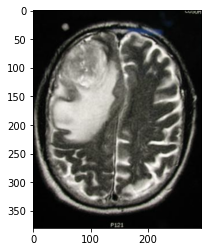

In [4]:
img = cv2.imread(yes_path+'\Y22.jpg')
print(img.shape)
plt.imshow(img)

In [5]:
vals = [yes_path, no_path]
print("The no of images in yes path is", os.listdir(vals[0]).__len__())
print("The number of images in no path is {}".format(os.listdir(vals[1]).__len__()))

The no of images in yes path is 155
The number of images in no path is 98


In [7]:
pathdir = [yes_path, no_path]
classes = ['yes', 'no']
filepaths = []
labels=[]
for i, j in zip(pathdir, classes):
    filelist = os.listdir(i)
    print(filelist)
    for vals in filelist:
        x = os.path.join(i, vals)
        filepaths.append(x)
        labels.append(j)
print(filepaths.__len__(), labels.__len__())

['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg', 'Y103.jpg', 'Y104.jpg', 'Y105.jpg', 'Y106.jpg', 'Y107.jpg', 'Y108.jpg', 'Y109.JPG', 'Y11.jpg', 'Y111.JPG', 'Y112.JPG', 'Y113.JPG', 'Y114.JPG', 'Y115.JPG', 'Y116.JPG', 'Y117.JPG', 'Y12.jpg', 'Y120.JPG', 'Y13.jpg', 'Y14.jpg', 'Y146.JPG', 'Y147.JPG', 'Y148.JPG', 'Y15.jpg', 'Y153.jpg', 'Y154.jpg', 'Y155.JPG', 'Y156.JPG', 'Y157.JPG', 'Y158.JPG', 'Y159.JPG', 'Y16.JPG', 'Y160.JPG', 'Y161.JPG', 'Y162.jpg', 'Y163.JPG', 'Y164.JPG', 'Y165.JPG', 'Y166.JPG', 'Y167.JPG', 'Y168.jpg', 'Y169.jpg', 'Y17.jpg', 'Y170.JPG', 'Y18.JPG', 'Y180.jpg', 'Y181.jpg', 'Y182.JPG', 'Y183.jpg', 'Y184.JPG', 'Y185.jpg', 'Y186.jpg', 'Y187.jpg', 'Y188.jpg', 'Y19.JPG', 'Y192.JPG', 'Y193.JPG', 'Y194.jpg', 'Y195.JPG', 'Y2.jpg', 'Y20.jpg', 'Y21.jpg', 'Y22.jpg', 'Y23.JPG', 'Y24.jpg', 'Y242.JPG', 'Y243.JPG', 'Y244.JPG', 'Y245.jpg', 'Y246.JPG', 'Y247.JPG', 'Y248.JPG', 'Y249.JPG', 'Y25.jpg', 'Y250.jpg', 'Y251.JPG', 'Y252.jpg', 'Y253.JPG', 'Y254.jpg', 'Y255.JPG', 'Y256.JPG',

In [8]:
filepaths[0:5]

['C:\\Users\\USER\\Downloads\\DL\\Dataset\\brain_tumor_dataset\\yes\\Y1.jpg',
 'C:\\Users\\USER\\Downloads\\DL\\Dataset\\brain_tumor_dataset\\yes\\Y10.jpg',
 'C:\\Users\\USER\\Downloads\\DL\\Dataset\\brain_tumor_dataset\\yes\\Y100.JPG',
 'C:\\Users\\USER\\Downloads\\DL\\Dataset\\brain_tumor_dataset\\yes\\Y101.jpg',
 'C:\\Users\\USER\\Downloads\\DL\\Dataset\\brain_tumor_dataset\\yes\\Y102.jpg']

In [9]:
labels[0:5]

['yes', 'yes', 'yes', 'yes', 'yes']

In [10]:
dataset = list(zip(filepaths, labels))
pathframe = pd.DataFrame(dataset, columns = ['filepaths','labels'])

In [11]:
pathframe.head()

,filepaths,labels
0,C:\Users\USER\Downloads\DL\Dataset\brain_tumor...,yes
1,C:\Users\USER\Downloads\DL\Dataset\brain_tumor...,yes
2,C:\Users\USER\Downloads\DL\Dataset\brain_tumor...,yes
3,C:\Users\USER\Downloads\DL\Dataset\brain_tumor...,yes
4,C:\Users\USER\Downloads\DL\Dataset\brain_tumor...,yes


In [12]:
pathframe.labels.value_counts()

yes    155
no      98
Name: labels, dtype: int64

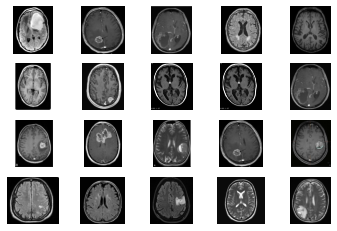

In [13]:
for i in range(0, 20):
    vals = np.random.randint(1, len(pathframe))
    plt.subplot(4,5, i+1)
    plt.imshow(cv2.imread(pathframe.filepaths[vals]))
    plt.axis('off')
plt.show()

In [14]:
Train, Test = train_test_split(pathframe, train_size=0.90, random_state=0)
Train_new, valid = train_test_split(Train, train_size=0.90, random_state=0)
print(Train.shape, Test.shape, Train_new.shape, valid.shape)

(227, 2) (26, 2) (204, 2) (23, 2)


In [27]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range= 40, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
                                  zoom_range=0.2,horizontal_flip=True, vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [28]:
train_gen = train_datagen.flow_from_dataframe(dataframe=Train_new, x_col='filepaths', y_col='labels', batch_size=16,
                                             target_size=(150, 150), class_mode='binary', shuffle=True)
valid_gen  = train_datagen.flow_from_dataframe(dataframe=valid, x_col='filepaths', y_col='labels', batch_size=16,
                                              target_size=(150,150), class_mode='binary', shuffle=True)
test_gen = test_datagen.flow_from_dataframe(dataframe=Test, x_col='filepaths', y_col = 'labels', batch_size=16,
                                           target_size=(150,150), class_mode='binary', shuffle=False)


Found 204 validated image filenames belonging to 2 classes.
Found 23 validated image filenames belonging to 2 classes.
Found 26 validated image filenames belonging to 2 classes.


In [29]:
print(train_gen.class_indices)
print(train_gen[0][0].shape)

{'no': 0, 'yes': 1}
(16, 150, 150, 3)


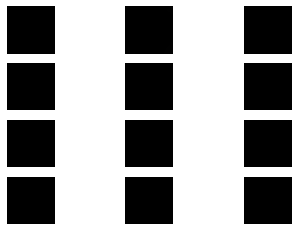

In [30]:
for i in range(0, 12):
    val = train_gen[0][0][i]
    vals = val.astype('uint8')
    plt.subplot(4,3, i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show()

15.8125